# Digit Recogniser

The given task:
"In this competition, your goal is to correctly identify digits from a dataset of tens of thousands of handwritten images. We’ve curated a set of tutorial-style kernels which cover everything from regression to neural networks. We encourage you to experiment with different algorithms to learn first-hand what works well and how techniques compare."

The data:

    Training:
    42,000 images of digits
    Column 0: Number depicted by image
    Column 1-784: Pixel intensity (0 black, 255 white)
    
    Example:
|label | pixel 0 | pixel 1 | pixel 2 | ... | pixel 783|
|------|---------|---------|---------|-----|----------|
|3     | 0       | 16      | 94      | ... | 43       |
    

In [136]:
# Imports
%matplotlib inline
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
print("Successfully imported modules")

Successfully imported modules


## 1. Preparing the data

In this section we will be preparing the data before training the model.

Read files and separate information from training into labels and data. Then normalise data and reshape into the shape of the original image.

Reading files
	Reading training...
	Reading testing...
Finished
29400
12600
29400
12600


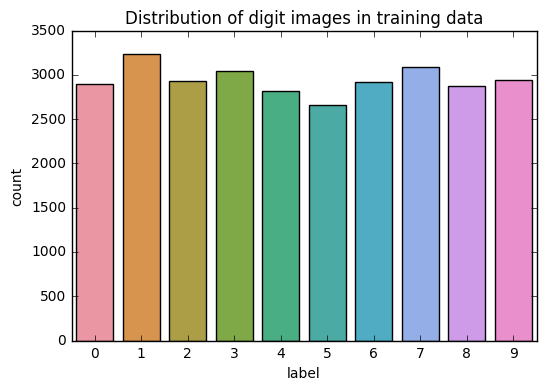

In [151]:
# Read data
print("Reading files\n\tReading training...")
training = pd.read_csv("train.csv")
train_y = training["label"]
train_x = training.drop("label", axis = 1)

print("\tReading testing...")
#test_x = pd.read_csv("test.csv")
print("Finished")

# Split data into training / testing
train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, test_size = 0.3, random_state=2)

# Plot number of features
cp = sns.countplot(train_y)
cp.set_title("Distribution of digit images in training data")
plt.show(cp)

Normalising


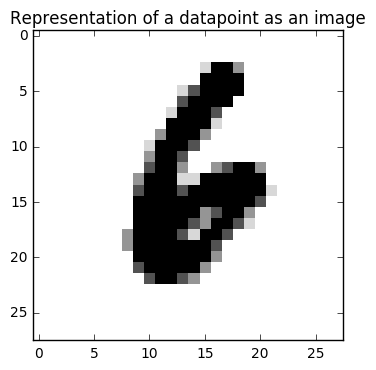

In [148]:
# Normalise data
print("Normalising")
train_x = train_x / 255.0

# Reshape
train_x = np.array(train_x).reshape(-1, 28, 28, 1)
plt.imshow(train_x[0][:,:,0], cmap='Greys', interpolation='nearest')
plt.title('Representation of a datapoint as an image')
plt.show()

###### 2. Creation and training of classifier

In [155]:
def train_classifier(inputs, outputs, batch_size):
    dataset = tf.data.Dataset.from_tensor_slices((dict(inputs), outputs))
    dataset = dataset.shuffle(1000).repeat().batch(batch_size)
    return dataset.make_one_shot_iterator().get_next()

columns_feat = []
for x in range(0, 784):
    columns_feat.append(tf.feature_column.numeric_column(key='pixel' + str(x)))
    
classifier = tf.estimator.DNNClassifier(
    feature_columns = columns_feat,
    # Two layers of 10 nodes
    hidden_units=[10, 10],
    # 10 classes: 0-9
    n_classes=10)

print("Training classifier...")
classifier.train(
    input_fn = lambda:train_classifier(train_x, train_y, 100),
    steps = 1000)
print("Finished training")

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_session_config': None, '_save_checkpoints_secs': 600, '_keep_checkpoint_every_n_hours': 10000, '_save_summary_steps': 100, '_tf_random_seed': None, '_model_dir': '/var/folders/9x/0llvldjs3qdbgxvbn2z6lg2m0000gn/T/tmptm7au5t4', '_keep_checkpoint_max': 5, '_task_id': 0, '_num_ps_replicas': 0, '_task_type': 'worker', '_num_worker_replicas': 1, '_save_checkpoints_steps': None, '_log_step_count_steps': 100, '_is_chief': True, '_master': '', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x286082550>, '_service': None}
Training classifier...
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/9x/0llvldjs3qdbgxvbn2z6lg2m0000gn/T/tmptm7au5t4/model.ckpt.
INFO:tensorflow:step = 1, loss = 5135.5547
INFO:tensorflow:global_step/sec: 7.85231
INFO:tensorflow:step = 101, loss = 195.46994 (12.738 sec)
INFO:tensorflow:global_step/sec: 11.8546
INFO:tensor

## 3. Evaluate classifier on testing data

In [ ]:
# Define evaluation function
def evaluation_function(attributes, classes, batch_size):
    attributes=dict(attributes)
    if classes is None:
        inputs = attributes
    else:
        inputs = (attributes, classes)
    dataset = tf.data.Dataset.from_tensor_slices(inputs)
    assert batch_size is not None, "batch_size must not be None"
    dataset = dataset.batch(batch_size)
    return dataset.make_one_shot_iterator().get_next()

# Evaluate the model.
eval_result = classifier.evaluate(
    input_fn=lambda:evaluation_function(test_x, test_y, 100))

INFO:tensorflow:Starting evaluation at 2018-03-02-15:38:24
INFO:tensorflow:Restoring parameters from /var/folders/9x/0llvldjs3qdbgxvbn2z6lg2m0000gn/T/tmptm7au5t4/model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2018-03-02-15:38:45
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.49071428, average_loss = 1.3845457, global_step = 1000, loss = 138.45456
